### BUSSSINESS PROGRAM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load DataSets

In [3]:
df = pd.read_csv('student_mark.csv')

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [8]:
df.shape


(200, 2)

### discover the visualise data to again Insight

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [11]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


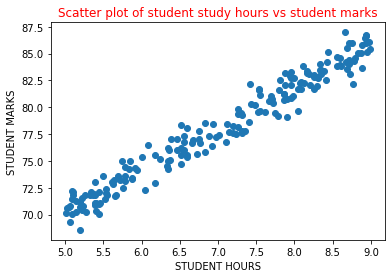

In [15]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("STUDENT HOURS")
plt.ylabel("STUDENT MARKS")
plt.title("Scatter plot of student study hours vs student marks",color="r")
plt.show()

### prepare the data for machine leaning algorithm 

### data cleaning

In [18]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [19]:
df.mean()


study_hours       6.995949
student_marks    77.933750
dtype: float64

In [20]:
df2 = df.fillna(df.mean())

In [21]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [22]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


### split dataset

In [34]:
x = df2.drop('student_marks',axis=1)
y = df2.drop('study_hours',axis=1)

In [35]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [37]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape


(40, 1)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
lr.coef_


array([[3.89007883]])

In [49]:
lr.intercept_

array([50.68626977])

In [51]:
y_pred = lr.predict(x_test)

In [52]:
y_pred

array([[71.42038995],
       [82.42931306],
       [72.23730651],
       [83.98534459],
       [83.40183276],
       [79.78405945],
       [81.72909887],
       [77.64451609],
       [80.600976  ],
       [76.36079007],
       [70.40896946],
       [78.9282421 ],
       [70.21446551],
       [77.02210348],
       [81.6123965 ],
       [80.98998389],
       [71.84829863],
       [77.9010618 ],
       [85.42467376],
       [79.12274605],
       [83.16842803],
       [80.05636497],
       [82.97392409],
       [77.9010618 ],
       [81.6123965 ],
       [72.82081833],
       [79.08384526],
       [82.23480911],
       [81.30119019],
       [85.42467376],
       [72.23730651],
       [73.40433016],
       [79.2783492 ],
       [73.05422306],
       [77.45001215],
       [81.06778546],
       [77.9557224 ],
       [81.57349571],
       [77.9010618 ],
       [71.57599311]])

In [54]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns = ['Study hours','student marks','predicted marks'])

,Study hours,student marks,predicted marks
0,5.330000,71.85,71.420390
1,8.160000,83.36,82.429313
2,5.540000,72.38,72.237307
3,8.560000,83.88,83.985345
4,8.410000,82.50,83.401833
5,7.480000,80.17,79.784059
6,7.980000,81.08,81.729099
7,6.930000,78.45,77.644516
8,7.690000,81.01,80.600976
9,6.600000,78.05,76.360790


### fine tune  your model

In [56]:
lr.score(x_test,y_test)

0.9459657639439203

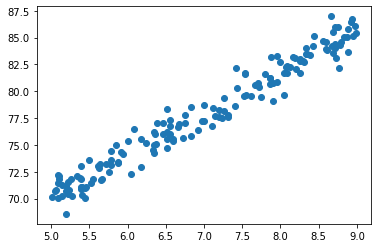

In [58]:
plt.scatter(x_train,y_train)
plt.show()

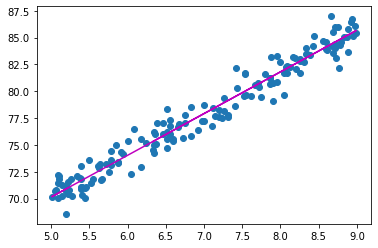

In [59]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color="m")
plt.show()

### present your solution

### save ml model

In [61]:
import joblib

In [62]:
joblib.dump(lr,'student_mark_predicted.pkl')

['student_mark_predicted.pkl']

### check the model actually work

In [63]:
model = joblib.load('student_mark_predicted.pkl')

In [65]:
model.predict([[5]])[0][0]

70.136663937973